In [60]:
"""
A funcao 'plota' produz um gráfico da estrutura definida pela matriz de nos N 
e pela incidencia Inc.

Sugestao de uso:

from funcoesTermosol import plota
plota(N,Inc)
-------------------------------------------------------------------------------
A funcao 'importa' retorna o numero de nos [nn], a matriz dos nos [N], o numero
de membros [nm], a matriz de incidencia [Inc], o numero de cargas [nc], o vetor
carregamento [F], o numero de restricoes [nr] e o vetor de restricoes [R] 
contidos no arquivo de entrada.

Sugestao de uso:
    
from funcoesTermosol import importa
[nn,N,nm,Inc,nc,F,nr,R] = importa('entrada.xlsx')
-------------------------------------------------------------------------------
A funcao 'geraSaida' cria um arquivo nome.txt contendo as reacoes de apoio Ft, 
deslocamentos Ut, deformacoes Epsi, forcas Fi e tensoes Ti internas. 
As entradas devem ser vetores coluna.

Sugestao de uso:
    
from funcoesTermosol import geraSaida
geraSaida(nome,Ft,Ut,Epsi,Fi,Ti)
-------------------------------------------------------------------------------

"""
import math
from traceback import print_list

import numpy as np


def plota(N,Inc):
    # Numero de membros
    nm = len(Inc[:,0])
    
    import matplotlib as mpl
    import matplotlib.pyplot as plt

#    plt.show()
    fig = plt.figure()
    # Passa por todos os membros
    for i in range(nm):
        
        # encontra no inicial [n1] e final [n2] 
        n1 = int(Inc[i,0])
        n2 = int(Inc[i,1])        

        plt.plot([N[0,n1-1],N[0,n2-1]],[N[1,n1-1],N[1,n2-1]],color='r',linewidth=3)


    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    
def importa(entradaNome):
    
    import numpy as np
    import xlrd
    
    arquivo = xlrd.open_workbook(entradaNome)
    
    ################################################## Ler os nos
    nos = arquivo.sheet_by_name('Nos')
    
    # Numero de nos
    nn = int(nos.cell(1,3).value)
                 
    # Matriz dos nós
    N = np.zeros((2,nn))
    
    for c in range(nn):
        N[0,c] = nos.cell(c+1,0).value
        N[1,c] = nos.cell(c+1,1).value
    
    ################################################## Ler a incidencia
    incid = arquivo.sheet_by_name('Incidencia')
    
    # Numero de membros
    nm = int(incid.cell(1,5).value)
                 
    # Matriz de incidencia
    Inc = np.zeros((nm,4))
    
    for c in range(nm):
        Inc[c,0] = int(incid.cell(c+1,0).value)
        Inc[c,1] = int(incid.cell(c+1,1).value)
        Inc[c,2] = incid.cell(c+1,2).value
        Inc[c,3] = incid.cell(c+1,3).value
    
    ################################################## Ler as cargas
    carg = arquivo.sheet_by_name('Carregamento')
    
    # Numero de cargas
    nc = int(carg.cell(1,4).value)
                 
    # Vetor carregamento
    F = np.zeros((nn*2,1))
    
    for c in range(nc):
        no = carg.cell(c+1,0).value
        xouy = carg.cell(c+1,1).value
        GDL = int(no*2-(2-xouy)) 
        F[GDL-1,0] = carg.cell(c+1,2).value
         
    ################################################## Ler restricoes
    restr = arquivo.sheet_by_name('Restricao')
    
    # Numero de restricoes
    nr = int(restr.cell(1,3).value)
                 
    # Vetor com os graus de liberdade restritos
    R = np.zeros((nr,1))
    
    for c in range(nr):
        no = restr.cell(c+1,0).value
        xouy = restr.cell(c+1,1).value
        GDL = no*2-(2-xouy) 
        R[c,0] = GDL-1


    return nn,N,nm,Inc,nc,F,nr,R

def geraSaida(nome,Ft,Ut,Epsi,Fi,Ti):
    nome = nome + '.txt'
    f = open("saida.txt","w+")
    f.write('Reacoes de apoio [N]\n')
    f.write(str(Ft))
    f.write('\n\nDeslocamentos [m]\n')
    f.write(str(Ut))
    f.write('\n\nDeformacoes []\n')
    f.write(str(Epsi))
    f.write('\n\nForcas internas [N]\n')
    f.write(str(Fi))
    f.write('\n\nTensoes internas [Pa]\n')
    f.write(str(Ti))
    f.close()
    


nn,N,nm,Inc,nc,F,nr,R = importa(entradaNome='entrada.xlsx')


{1: [0.4, 1.0, 0.0, 210000000000.0, 0.0002, 1.0, 2.0], 2: [0.3, 0.0, 1.0, 210000000000.0, 0.0002, 2.0, 3.0], 3: [0.5, -0.8, -0.6, 210000000000.0, 0.0002, 3.0, 1.0]}
1.0
2.0
3.0
2.0
3.0
1.0
{1: [1, 2], 2: [3, 4], 3: [5, 6]}
{1: [1, 2, 3, 4], 2: [3, 4, 5, 6], 3: [1, 2, 5, 6]}
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
1
2
3
4
3
4
5
6
1
2
5
6


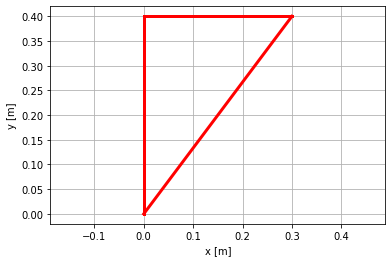

In [61]:

def calculo_L_angulos(N, Inc):
    linhas, colunas = N.shape
    dict_nos = {}
    dict_l = {}
    for i in range(colunas):
        x = N[0][i]
        y = N[1][i]
        dict_nos[i+1] = [x, y]

    linhas_inc, colunas_inc = Inc.shape

    for j in range(linhas_inc):
        no1 = Inc[j][0]
        no2 = Inc[j][1]
        x1, y1 = dict_nos[no1]
        x2, y2 = dict_nos[no2]
        l = math.sqrt((x1-x2)**2+(y1-y2)**2)
        sen = (y2-y1)/l
        cos = (x2-x1)/l
        #comprimento, seno, cosseno, E, A, no1, no2
        dict_l[j+1] = [l, sen, cos, Inc[j][2], Inc[j][3], Inc[j][0], Inc[j][1]]
    
    return(dict_l)


def define_graus_liberdade(dict_L):
    dict_nos_graus = {}
    
    contador = 1
            
    for i in range(1, len(dict_L)+1):
        if (dict_L[i][5] not in dict_nos_graus) and (dict_L[i][5] == i):
            print(dict_L[i][5])
            dict_nos_graus[i] = [contador, contador+1] # cada nó, dois graus de liberdade
            contador+=2
            
    j = 1;
    begin = len(dict_nos_graus)+1
    end = begin + len(dict_L)
    for i in range(begin, end): 
        print(dict_L[j][6])
        if (dict_L[j][6] not in dict_nos_graus) and (dict_L[j][6] == i):
            dict_nos_graus[i] = [contador, contador+1]
            contador+=2
        j+=1
            
    return dict_nos_graus


def calcula_Ke(dict_l):
    import numpy as np
    dict_Ke = {}
    dict_K_elemento = {}

    for elm in dict_l.keys():
        E = dict_l[elm][3]
        A = dict_l[elm][4]
        s = dict_l[elm][1]
        c = dict_l[elm][2]
        L = dict_l[elm][0]
        no1 = dict_l[elm][5]
        no2 = dict_l[elm][6]
        

        dict_Ke[elm] =  [[c**2, c*s, -c**2, -c*s],
                        [c*s, s**2, -c*s, -s**2],
                        [-c**2, -c*s, c**2, c*s],
                        [-c*s, -s**2, c*s, s**2]]

        k = ((E*A)/L)
        dict_K_elemento[elm] = np.multiply(dict_Ke[elm], k)

    return dict_K_elemento


def relaciona_elemento_graus_liberdade(dict_L, dict_nos_graus):
    import numpy as np
    elemento_graus_liberdade = {}

    for i in range(1, len(dict_L)+1):
        elemento_graus_liberdade[i] = []
        
    for i in range(1, len(dict_L)+1):
        for j in range(1, len(dict_nos_graus)+1):
            if (dict_L[i][5] == j): # se elemento nao está no dic e nó é o que quero ver os graus de lib
                elemento_graus_liberdade[i].extend(dict_nos_graus[j])
            elif (dict_L[i][6] == j):
                elemento_graus_liberdade[i].extend(dict_nos_graus[j]) 
            
    print(elemento_graus_liberdade)
    return elemento_graus_liberdade
    

def montaMatrizGeral(dict_K_elemento, elemento_graus_liberdade):
    matrizGeral = np.zeros((len(elemento_graus_liberdade)*2, len(elemento_graus_liberdade)*2))
    print(matrizGeral)
    
    for elemento in dict_K_elemento.keys():
        u1 = elemento_graus_liberdade[elemento][0]  #lembrando que index de matriz é isso menos 1, já que começa em 0
        u2 = elemento_graus_liberdade[elemento][1]
        u3 = elemento_graus_liberdade[elemento][2]
        u4 = elemento_graus_liberdade[elemento][3]
        print(u1)
        print(u2)
        print(u3)
        print(u4)
        
        matrizGeral[u1-1][u1-1] += dict_K_elemento[elemento][0][0]
        matrizGeral[u1-1][u2-1] += dict_K_elemento[elemento][0][1]
        matrizGeral[u1-1][u3-1] += dict_K_elemento[elemento][0][2]
        matrizGeral[u1-1][u4-1] += dict_K_elemento[elemento][0][3]
        
        matrizGeral[u2-1][u1-1] += dict_K_elemento[elemento][1][0]
        matrizGeral[u2-1][u2-1] += dict_K_elemento[elemento][1][1]
        matrizGeral[u2-1][u3-1] += dict_K_elemento[elemento][1][2]
        matrizGeral[u2-1][u4-1] += dict_K_elemento[elemento][1][3]
        
        matrizGeral[u3-1][u1-1] += dict_K_elemento[elemento][2][0]
        matrizGeral[u3-1][u2-1] += dict_K_elemento[elemento][2][1]
        matrizGeral[u3-1][u3-1] += dict_K_elemento[elemento][2][2]
        matrizGeral[u3-1][u4-1] += dict_K_elemento[elemento][2][3]
        
        matrizGeral[u4-1][u1-1] += dict_K_elemento[elemento][3][0]
        matrizGeral[u4-1][u2-1] += dict_K_elemento[elemento][3][1]
        matrizGeral[u4-1][u3-1] += dict_K_elemento[elemento][3][2]
        matrizGeral[u4-1][u4-1] += dict_K_elemento[elemento][3][3]

    return matrizGeral


dict_L = calculo_L_angulos(N, Inc)
print(dict_L)

dict_nos_graus = define_graus_liberdade(dict_L)
print(dict_nos_graus)

dict_cada_elemento = calcula_Ke(dict_L)

dict_elemento_graus = relaciona_elemento_graus_liberdade(dict_L, dict_nos_graus)

matrizGeral = montaMatrizGeral(dict_cada_elemento, dict_elemento_graus)

plota(N,Inc)


In [62]:
def aplicaRestricao(R, dict_nos_graus, matrizGeral, F):
    exclui_lista = []
    for restricao in R:
        exclui_lista.append(int(restricao[0]))
    
    exclui_lista.sort(reverse = True)
    print(exclui_lista)
    for i in range(len(exclui_lista)):
        matrizGeral = np.delete(matrizGeral, exclui_lista[i], axis=0)    
        matrizGeral = np.delete(matrizGeral, exclui_lista[i], axis=1)    
        F = np.delete(F, exclui_lista[i], axis=0)
        
    
    print(matrizGeral)
    print(F)
    return exclui_lista, matrizGeral, F
        
        
exclui_lista,matrizRestricao, Fajustado = aplicaRestricao(R, dict_nos_graus, matrizGeral, F)

[3, 2, 0]
[[ 1.5876e+08 -4.0320e+07 -5.3760e+07]
 [-4.0320e+07  1.7024e+08  4.0320e+07]
 [-5.3760e+07  4.0320e+07  5.3760e+07]]
[[   0.]
 [ 150.]
 [-100.]]


In [63]:

def resolve_gauss(ite, tol, K, F):
    contador = 0
    linhas, colunas = np.shape(K)
    X = np.zeros((linhas, 1))
    X_anterior = np.zeros((linhas, 1))
    erros_lista = np.ones((linhas, 1))
    
    while (contador < ite):
        for i in range(linhas):
            X_anterior[i] = X[i]   
        for i in range(linhas):
            soma_k_vezes_u = 0
            for j in range(0,colunas):
                if (j != i):
                    soma_k_vezes_u += K[i][j]*X[j]    

            resultado = (F[i]-soma_k_vezes_u)/K[i][i]
            X[i] = resultado

            if (X[i] != 0):
                erros_lista[i] = abs((X[i] - X_anterior[i])/X[i])

        erro = np.amax(erros_lista)

        contador+=1
        
        if erro <= tol :
            print('Chegou na tolerância! ', contador)
            break
    return X
    
    
lista_resultado = resolve_gauss(10000, 1e-8, matrizRestricao, Fajustado)

print(lista_resultado)


Chegou na tolerância!  19
[[-9.52380949e-07]
 [ 1.60714285e-06]
 [-4.01785714e-06]]


In [64]:
def determina_tensao(deslocamento_matriz, dict_L, dict_elemento_graus, exclui_lista, lista_resultado, dict_nos_graus):
    matriz_tensao = {}
    matriz_desloca_completa = np.zeros((len(dict_L)*2, 1))
        
    exclui_lista.sort(reverse = False)
                
    j = 0
    z = 0
    for i in range(len(matriz_desloca_completa)):  
        if z < len(exclui_lista) and exclui_lista[z] == i:
            matriz_desloca_completa[i] = 0
            z+=1
        else:
            matriz_desloca_completa[i] = deslocamento_matriz[j]
            j+=1
            
    print(matriz_desloca_completa)
            
    i = 0
    for elm in dict_L.keys():
        E = dict_L[elm][3]
        A = dict_L[elm][4]
        s = dict_L[elm][1]
        c = dict_L[elm][2]
        L = dict_L[elm][0]
        no1 = dict_L[elm][5]
        no2 = dict_L[elm][6]
        
        k = (E/L)
        matriz_angulos = [[-c, -s, c, s]]  
        
        
        
        index1 = (dict_nos_graus[int(no1)][0])-1
        index2 = (dict_nos_graus[int(no1)][1])-1
        index3 = (dict_nos_graus[int(no2)][0])-1
        index4 = (dict_nos_graus[int(no2)][1])-1

        print(index1, index2, index3, index4)
        
        matriz_u_vetor_nos = [[matriz_desloca_completa[index1][0]], 
                              [matriz_desloca_completa[index2][0]], 
                              [matriz_desloca_completa[index3][0]], 
                              [matriz_desloca_completa[index4][0]]]
        
        print(f'nó1 {no1} no2 {no2}')
        print(f'MATRIZ U: {matriz_u_vetor_nos}') 
        
        mult_matriz = np.matmul(matriz_angulos, matriz_u_vetor_nos)
    
        print(mult_matriz)
        
        multiplica = np.multiply(mult_matriz, k)
        
        matriz_tensao[elm] = multiplica
        
        
        i+=2
    print(matriz_tensao)
    return matriz_tensao

determina_tensao(lista_resultado, dict_L, dict_elemento_graus, exclui_lista, lista_resultado, dict_nos_graus)


[[ 0.00000000e+00]
 [-9.52380949e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.60714285e-06]
 [-4.01785714e-06]]
0 1 2 3
nó1 1.0 no2 2.0
MATRIZ U: [[0.0], [-9.523809491170456e-07], [0.0], [0.0]]
[[9.52380949e-07]]
2 3 4 5
nó1 2.0 no2 3.0
MATRIZ U: [[0.0], [0.0], [1.60714285396717e-06], [-4.01785713721147e-06]]
[[1.60714285e-06]]
4 5 0 1
nó1 3.0 no2 1.0
MATRIZ U: [[1.60714285396717e-06], [-4.01785713721147e-06], [0.0], [-9.523809491170456e-07]]
[[-1.48809524e-06]]
{1: array([[499999.99828645]]), 2: array([[1124999.99777702]]), 3: array([[-625000.]])}


{1: array([[499999.99828645]]),
 2: array([[1124999.99777702]]),
 3: array([[-625000.]])}

In [65]:
def determina_deformacao(deslocamento_matriz, dict_L, dict_elemento_graus, exclui_lista, lista_resultado, dict_nos_graus):
    matriz_tensao = {}
    matriz_desloca_completa = np.zeros((len(dict_L)*2, 1))
        
    exclui_lista.sort(reverse = False)
                
    j = 0
    z = 0
    for i in range(len(matriz_desloca_completa)):  
        if z < len(exclui_lista) and exclui_lista[z] == i:
            matriz_desloca_completa[i] = 0
            z+=1
        else:
            matriz_desloca_completa[i] = deslocamento_matriz[j]
            j+=1
            
    print(matriz_desloca_completa)
            
    i = 0
    for elm in dict_L.keys():
        E = dict_L[elm][3]
        A = dict_L[elm][4]
        s = dict_L[elm][1]
        c = dict_L[elm][2]
        L = dict_L[elm][0]
        no1 = dict_L[elm][5]
        no2 = dict_L[elm][6]
        
        k = (1/L)
        matriz_angulos = [[-c, -s, c, s]]  
        
        
        
        index1 = (dict_nos_graus[int(no1)][0])-1
        index2 = (dict_nos_graus[int(no1)][1])-1
        index3 = (dict_nos_graus[int(no2)][0])-1
        index4 = (dict_nos_graus[int(no2)][1])-1

        print(index1, index2, index3, index4)
        
        matriz_u_vetor_nos = [[matriz_desloca_completa[index1][0]], 
                              [matriz_desloca_completa[index2][0]], 
                              [matriz_desloca_completa[index3][0]], 
                              [matriz_desloca_completa[index4][0]]]
        
        print(f'nó1 {no1} no2 {no2}')
        print(f'MATRIZ U: {matriz_u_vetor_nos}') 
        
        mult_matriz = np.matmul(matriz_angulos, matriz_u_vetor_nos)
    
        print(mult_matriz)
        
        multiplica = np.multiply(mult_matriz, k)
        
        matriz_tensao[elm] = multiplica
        
        
        i+=2
    print(matriz_tensao)
    return matriz_tensao

determina_deformacao(lista_resultado, dict_L, dict_elemento_graus, exclui_lista, lista_resultado, dict_nos_graus)


[[ 0.00000000e+00]
 [-9.52380949e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.60714285e-06]
 [-4.01785714e-06]]
0 1 2 3
nó1 1.0 no2 2.0
MATRIZ U: [[0.0], [-9.523809491170456e-07], [0.0], [0.0]]
[[9.52380949e-07]]
2 3 4 5
nó1 2.0 no2 3.0
MATRIZ U: [[0.0], [0.0], [1.60714285396717e-06], [-4.01785713721147e-06]]
[[1.60714285e-06]]
4 5 0 1
nó1 3.0 no2 1.0
MATRIZ U: [[1.60714285396717e-06], [-4.01785713721147e-06], [0.0], [-9.523809491170456e-07]]
[[-1.48809524e-06]]
{1: array([[2.38095237e-06]]), 2: array([[5.35714285e-06]]), 3: array([[-2.97619048e-06]])}


{1: array([[2.38095237e-06]]),
 2: array([[5.35714285e-06]]),
 3: array([[-2.97619048e-06]])}